In [202]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators

In [203]:
key = 'L49TNJ1SKAPIG4BA'

In [204]:
ts = TimeSeries(key, output_format = 'pandas')
data, meta = ts.get_daily('TSLA', outputsize = 'full')
columns = ['Open', 'High', 'Low', 'Close', 'Volume']
data.columns = columns
print(data)


               Open      High     Low   Close       Volume
date                                                      
2025-06-17  326.090  327.2600  314.74  316.35   88282669.0
2025-06-16  331.290  332.0500  326.41  329.13   83925858.0
2025-06-13  313.970  332.9900  313.30  325.31  128964279.0
2025-06-12  323.075  332.5600  316.86  319.11  105127536.0
2025-06-11  334.395  335.5000  322.50  326.43  122611360.0
...             ...       ...     ...     ...          ...
2010-07-06   20.000   20.0000   15.83   16.11    6866900.0
2010-07-02   23.000   23.1000   18.71   19.20    5139800.0
2010-07-01   25.000   25.9200   20.27   21.96    8218800.0
2010-06-30   25.790   30.4192   23.30   23.83   17187100.0
2010-06-29   19.000   25.0000   17.54   23.89   18766300.0

[3766 rows x 5 columns]


In [205]:
ti = TechIndicators(key, output_format = 'pandas')
roc, meta = ti.get_roc('TSLA')
print(sma)

                ROC
date               
2025-06-17  -7.5243
2025-06-16  -5.9575
2025-06-13  -5.1076
2025-06-12  -8.2173
2025-06-11  -2.2869
...             ...
2010-08-03  36.2508
2010-08-02   8.9583
2010-07-30  -9.1985
2010-07-29 -14.6034
2010-07-28 -13.2692

[3746 rows x 1 columns]


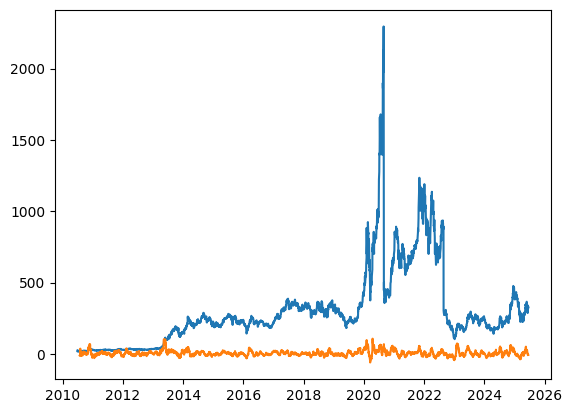

In [206]:
plt.plot(data['Open'])
plt.plot(roc)

In [262]:

data = data.sort_index()
data['Increase'] = (data['Close'] - data['Close'].shift(7)) / data['Close'].shift(7)
data = data.dropna(subset=['Increase'])
data = data.round(2)

In [263]:
train_data = data.loc['2012-02-01' : '2022-04-06']
test_data = data.loc['2022-04-07' : '2025-01-01']
print(train_data)

               Open     High      Low    Close      Volume  Increase
date                                                                
2012-02-01    29.07    29.70    29.00    29.58    523200.0      0.10
2012-02-02    29.72    30.88    29.60    30.25    805700.0      0.10
2012-02-03    30.41    31.33    30.25    31.15    764500.0      0.11
2012-02-06    31.10    31.90    31.05    31.80    652100.0      0.10
2012-02-07    31.80    31.80    30.82    31.60   1021600.0      0.08
...             ...      ...      ...      ...         ...       ...
2022-03-31  1094.57  1103.14  1076.64  1077.60  16330919.0      0.08
2022-04-01  1081.15  1094.75  1066.64  1084.59  18087741.0      0.09
2022-04-04  1089.38  1149.91  1072.53  1145.45  27392567.0      0.13
2022-04-05  1136.30  1152.87  1087.30  1091.26  26192187.0      0.08
2022-04-06  1073.47  1079.00  1027.70  1045.76  29782845.0     -0.04

[2563 rows x 6 columns]


In [209]:
roc = roc.sort_index()
roc = roc.round(0).astype(int)


In [210]:

train_roc = roc.loc['2012-02-01' : '2022-04-06']
test_roc = roc.loc['2022-04-07' : '2025-01-01']


In [211]:
train_data_close = train_data['Close']
print(train_data_close.iloc[0])
test_data_close = test_data['Close']
print(len(train_roc))
print(len(train_data))
print(len(test_roc))
print(len(test_data))  
print(train_roc)

29.58
2563
2563
687
687
            ROC
date           
2012-02-01    5
2012-02-02    9
2012-02-03   15
2012-02-06   18
2012-02-07   16
...         ...
2022-03-31   28
2022-04-01   29
2022-04-04   42
2022-04-05   32
2022-04-06   22

[2563 rows x 1 columns]


In [212]:
states = []
for i in range(-150, 150):
    states.append(i)
print(states)

[-150, -149, -148, -147, -146, -145, -144, -143, -142, -141, -140, -139, -138, -137, -136, -135, -134, -133, -132, -131, -130, -129, -128, -127, -126, -125, -124, -123, -122, -121, -120, -119, -118, -117, -116, -115, -114, -113, -112, -111, -110, -109, -108, -107, -106, -105, -104, -103, -102, -101, -100, -99, -98, -97, -96, -95, -94, -93, -92, -91, -90, -89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 5

In [213]:
q_table = pd.DataFrame(0, index = states, columns = ["buy", "sell", "hold"])
print(q_table)

      buy  sell  hold
-150    0     0     0
-149    0     0     0
-148    0     0     0
-147    0     0     0
-146    0     0     0
...   ...   ...   ...
 145    0     0     0
 146    0     0     0
 147    0     0     0
 148    0     0     0
 149    0     0     0

[300 rows x 3 columns]


In [251]:
# Training parameters
n_training_episodes = 100
learning_rate = 0.7

# Evaluation parameters
n_eval_episodes = 10000

# Environment parameters
env_id = "FrozenLake-v1"
max_steps = 99
gamma = 0.95
eval_seed = []

# Exploration parameters
max_epsilon = 1.0
min_epsilon = 0.05
decay_rate = 0.0005

class environment:

    def __init__(self, data, roc):
        self.data = data
        self.roc = roc
        self.balance = 100
        self.holding = None
        self.index = 1
        self.buy_price = None
        self.sell_price = None
        self.num_shares = None
        self.trend = None
        self.balance_history = []
        self.price = None
        self.rewards = []
        self.total_reward = 0

    def step(self, action):
         
        if self.index < len(self.data - 7):
            data = self.data
            index = self.index
        
            if action == "buy" and self.holding == False:
                self.buy_price = self.data.iloc[self.index]
                self.num_shares = self.balance / self.buy_price
                self.balance = 0
                
                
                
                
                reward = (data.iloc[index + 7] - data.iloc[index])/ data.iloc[index]
                
                self.holding = True
                
            elif action == "sell" and self.holding == True:
                self.sell_price = self.data.iloc[self.index]
                self.balance = self.num_shares * self.sell_price
                
                reward = ((data.iloc[index + 7] - data.iloc[index])/ data.iloc[index]) * -1
                self.num_shares = 0
                
                
                self.holding = False
                
                
            elif action == "hold":
                trend = self.get_trend()
                if trend == "up":
                    reward = 0.005
                    
                if trend == "down":
                    reward = -0.005
            else:
                reward = 0
            self.index += 1
            
            self.total_reward += reward
            self.rewards.append(self.total_reward)
            return (reward, False)
        else:
            return (0, True)
        
    def reset(self):
        self.balance = 100
        self.holding = False
        self.index = 1
        self.buy_price = None
        self.sell_price = None
        self.num_shares = None
        self.trend = None
        self.balance_history = []
    def get_trend(self):
        index = self.index
        
        if self.data.iloc[index] >= self.data.iloc[index - 1]:
            return "up"
        if self.data.iloc[index] < self.data.iloc[index - 1]:
            return "down"
    def get_net_worth(self):
        if self.holding == True:
            total = self.balance + (self.num_shares * self.data.iloc[self.index])
            return total
        else:
            return self.balance
    def get_state(self):
        net_worth = self.get_net_worth()
        self.balance_history.append(net_worth)
        return self.roc["ROC"].iloc[self.index]


In [252]:
import numpy as np
import random
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
    for episode in range(n_training_episodes):
  
 
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        # Reset the environment
        env.reset()  
        state = env.get_state()
        step = 0
        done = False
        actions = ["buy","sell","hold"]
        
    
        # repeat
        while env.index < (len(env.data) - 7):
       
            if random.uniform(0,1) > epsilon:
                action_index = Qtable.loc[state, :].argmax()
                action = Qtable.columns[action_index]
            else:
                action = random.choice(actions)
          
          
            reward, done = env.step(action)
            if done:
                break  
            new_state = env.get_state()
           
    
           
            Qtable.loc[state, action] = Qtable.loc[state, action] + learning_rate * (reward + gamma * (Qtable.loc[new_state, :].argmax()) - Qtable.loc[state, action])
          
          
    
            # If done, finish the episode
            if done:
                break
         
            # Our state is the new state
            state = new_state
    return Qtable

In [253]:
env = environment(train_data_close, train_roc)
print(env.get_state())
print(env.balance)
print(env.price)
print(q_table)

9
100
None
      buy  sell  hold
-150  0.0   0.0   0.0
-149  0.0   0.0   0.0
-148  0.0   0.0   0.0
-147  0.0   0.0   0.0
-146  0.0   0.0   0.0
...   ...   ...   ...
 145  0.0   0.0   0.0
 146  0.0   0.0   0.0
 147  0.0   0.0   0.0
 148  0.0   0.0   0.0
 149  0.0   0.0   0.0

[300 rows x 3 columns]


In [255]:

Qtable = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, q_table)

In [256]:
print(Qtable.loc[-20 : 20])

          buy      sell      hold
-20  1.062296  1.681679  1.062143
-19 -0.019931  0.288863  1.066409
-18  1.470729  1.033968  0.938476
-17  0.117918  0.343767  1.156391
-16  0.689441  0.695053  0.025703
-15  0.054888  1.382591  0.046387
-14  1.738755  1.891039  1.336895
-13  0.010120  1.542322  1.388189
-12  1.026208  0.949049  0.717240
-11  0.969702  1.436269  1.391779
-10  0.949375  0.768968  0.792572
-9   1.104733  0.751562  0.432254
-8   1.401228  0.619305  0.038294
-7   0.204598  1.504817  0.034544
-6   0.934739  0.301017  0.682430
-5   0.984278  1.566856  0.717666
-4   0.155456  0.771388  0.437906
-3   1.420516  0.640068  0.197471
-2   1.077272  0.147379  0.364058
-1   0.572068  0.501395  0.049319
 0   1.452143  1.525021  1.758948
 1   1.527972  1.861386  1.624198
 2   0.669884  0.250324  1.460032
 3   1.449983  1.356554  0.747598
 4   1.490183  0.764653  0.730662
 5   1.447080  0.033226  0.965033
 6   0.000122  0.892694  0.408046
 7   0.840522  0.527697  0.885893
 8   1.202523 

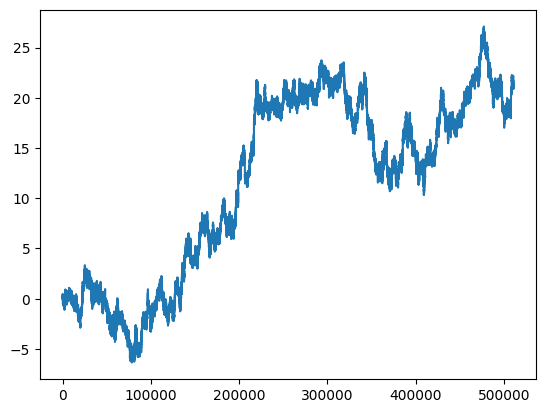

In [257]:
plt.plot(env.rewards)

Q table row = state, column = action

In [258]:
def test(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
    
    # Reset the environment
    env.reset()  
    state = env.get_state()
    step = 0
    done = False
    actions = ["buy","sell","hold"]
    action_history = []
    
    # repeat
    epsilon = 0.1
    while env.index < (len(env.data) - 7):
       
        if random.uniform(0,1) > epsilon:
            action_index = Qtable.loc[state, :].argmax()
            action = Qtable.columns[action_index]
        else:
            action = random.choice(actions)
        action_index = Qtable.loc[state, :].argmax()
        action = Qtable.columns[action_index]
        action_history.append(action)
        
        
          
          
        reward, done = env.step(action)
        if done:
            break  
        new_state = env.get_state()
           
    
           
            
          
          
    
            # If done, finish the episode
        if done:
            break
         
        # Our state is the new state
        state = new_state
    print(action_history)
    return Qtable

In [259]:
test_env = environment(test_data_close, test_roc)

In [260]:
test(n_training_episodes, min_epsilon, max_epsilon, decay_rate, test_env, max_steps, q_table)

['hold', 'hold', 'hold', 'sell', 'sell', 'sell', 'hold', 'buy', 'sell', 'buy', 'buy', 'sell', 'sell', 'sell', 'hold', 'hold', 'buy', 'sell', 'sell', 'buy', 'buy', 'buy', 'buy', 'buy', 'hold', 'hold', 'buy', 'hold', 'buy', 'buy', 'hold', 'hold', 'sell', 'hold', 'sell', 'sell', 'hold', 'hold', 'hold', 'hold', 'buy', 'buy', 'buy', 'sell', 'sell', 'buy', 'buy', 'buy', 'buy', 'hold', 'buy', 'hold', 'hold', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'hold', 'buy', 'buy', 'hold', 'buy', 'buy', 'buy', 'sell', 'sell', 'buy', 'buy', 'hold', 'sell', 'sell', 'buy', 'hold', 'buy', 'sell', 'hold', 'hold', 'buy', 'buy', 'buy', 'sell', 'buy', 'buy', 'sell', 'hold', 'sell', 'hold', 'sell', 'sell', 'buy', 'buy', 'buy', 'buy', 'buy', 'sell', 'buy', 'buy', 'buy', 'buy', 'buy', 'hold', 'buy', 'buy', 'sell', 'buy', 'buy', 'hold', 'hold', 'buy', 'sell', 'sell', 'buy', 'sell', 'sell', 'buy', 'buy', 'buy', 'sell', 'buy', 'buy', 'sell', 'buy', 'buy', 'hold', 'buy', 'hold', 'hold', 'hold', 'buy', 'buy', 'b

,buy,sell,hold
-150,0.0,0.0,0.0
-149,0.0,0.0,0.0
-148,0.0,0.0,0.0
-147,0.0,0.0,0.0
-146,0.0,0.0,0.0
...,...,...,...
145,0.0,0.0,0.0
146,0.0,0.0,0.0
147,0.0,0.0,0.0
148,0.0,0.0,0.0


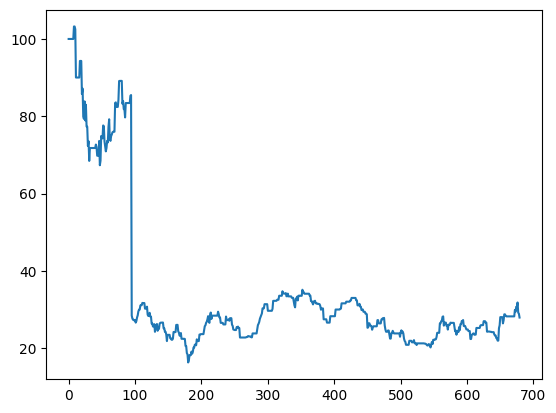

In [261]:
plt.plot(test_env.balance_history)